In [1]:
# get the environment
import sys
import os
print(sys.version)
print(sys.executable)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\python.exe


In [2]:
# create the path for the file
# C:\Users\bbutler\Documents\DigitalAnalytics

myPath = os.path.join('C:\\', 'Users', 'bbutler', 'Documents\DigitalAnalytics')

print(myPath)

os.chdir(myPath)
                      
os.listdir()

C:\Users\bbutler\Documents\DigitalAnalytics


['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 '2019 Flight 2 $350 campaign - June 1 to July 6 - Google + Bing KW data - 07-31-20.xlsx',
 '2019 Flight 3 $350 campaign - Sep 22 to Oct 26 - Google + Bing KW data - 07-31-20.xlsx',
 'Checking2019AllKeywords.csv',
 'Checking2019F2Keywords.csv',
 'Checking2019F3Keywords.csv',
 'Digital Customer Profile Data Elements.xlsx',
 'Digital Marketing opportunities - EB.com product pages - 03-13-20.pptx',
 'Digital_Campaign_Spend_CPAS.docx',
 'geoMap.csv',
 'GoogleKWTrends (1).Rmd',
 'GoogleKWTrends - old.html',
 'GoogleKWTrends.html',
 'GoogleKWTrends.Rmd',
 'GoogleKWTrends_files',
 'GoogleTrends.R',
 'GoogleTrendsHeloc.ipynb',
 'HELOC Flight 3 Week 7 check-in + campaign overview - July 27 to Aug 2 - 08-05-20.docx',
 'HelocFCast.ipynb',
 'HelocKeywords.csv',
 'HelocTermsMulti.csv',
 'HelocTermsRev.csv',
 'heloc_trends.csv',
 'LTV on Digital_V4.xlsx',
 'LTV on Digital_V5.xlsx',
 'LTV on Digital_V5Rev1.xlsx',
 'Seasonal.R',
 'testHeloc.csv',
 'times

In [3]:
# import the base libraries
# standard libraries
import pandas as pd
import numpy as np
import pyodbc
from pandas import Series, DataFrame
import os
import math
from itertools import cycle

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

# to visualize all of the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# get the time series module
import timeseries_module as ts
import timeseries_module_v1 as ts1

In [4]:
# import more libraries

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

from statsmodels.tools.eval_measures import mse, rmse

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

In [5]:
data = pd.read_csv('HelocTermsMulti.csv',index_col='Week', parse_dates=True)

data.head()

,equity loan,home equity
Week,,
2017-01-01,43,56
2017-01-08,29,42
2017-01-15,40,59
2017-01-22,21,45
2017-01-29,45,68


In [6]:
data.columns = ['equity_loan', 'home_equity']
data.head()

,equity_loan,home_equity
Week,,
2017-01-01,43,56
2017-01-08,29,42
2017-01-15,40,59
2017-01-22,21,45
2017-01-29,45,68


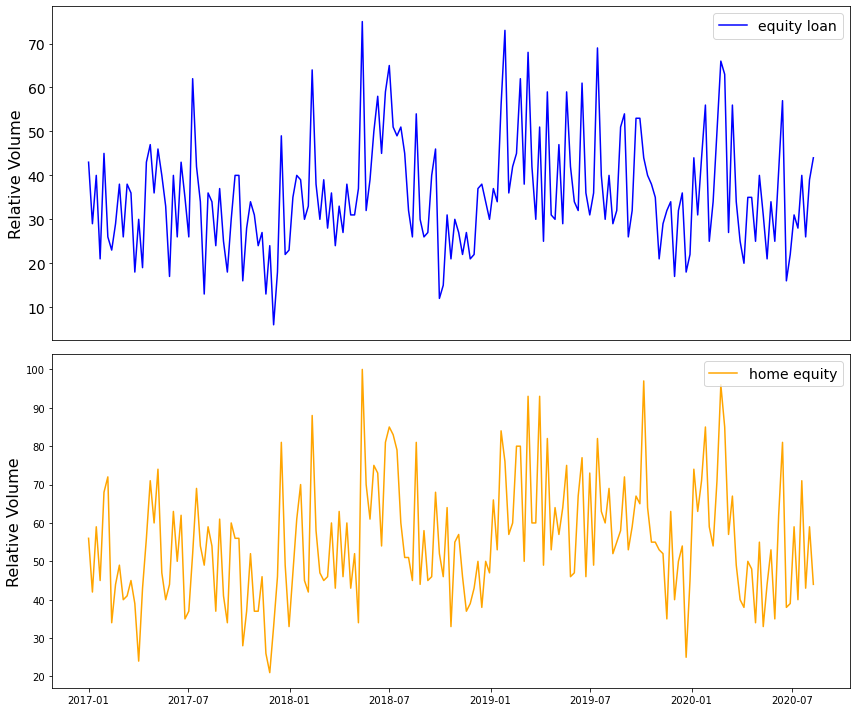

In [178]:
# make the nice plot

# set the figure size
fig = plt.figure(figsize = (12,10))

# the eries
ax1 = fig.add_subplot(211)
ax1.plot(data.index.values, data['equity_loan'], color = 'blue', label = 'equity loan')

# plot the legend for the first plot
ax1.legend(loc = 'upper right', fontsize = 14)

plt.ylabel('Relative Volume', fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=14) 

# Hide the top x axis
ax1.axes.get_xaxis().set_visible(False)

#######  NOW PLOT THE OTHER SERIES ON A SINGLE PLOT

# plot 212 is the home equity series

# plot series
ax2 = fig.add_subplot(212)
ax2.plot(data.index.values, data['home_equity'], color = 'orange', label = 'home equity')

# plot the legend for the second plot
ax2.legend(loc = 'upper right', fontsize = 14)

# set the fontsize for the bottom plot
plt.ylabel('Relative Volume', fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=14) 
plt.setp(ax1.get_xticklabels(), fontsize=14)

plt.tight_layout();
plt.show();

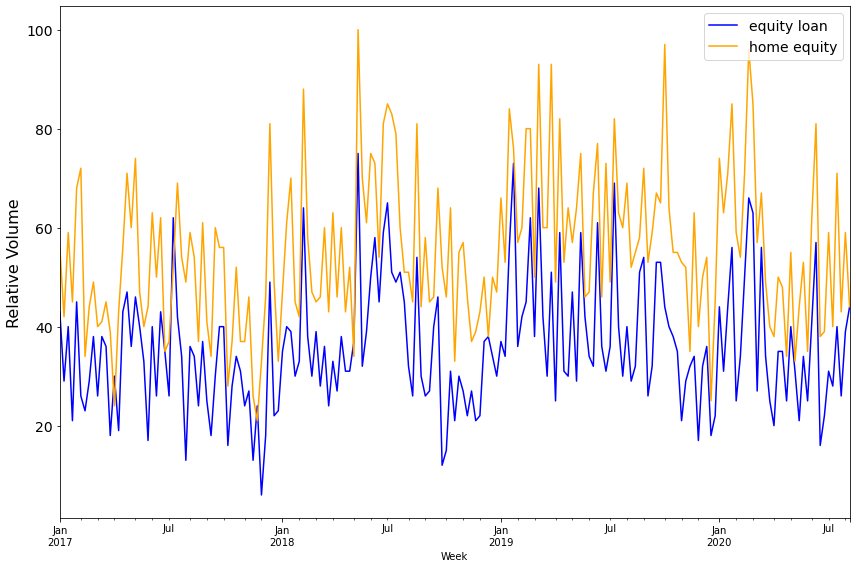

In [183]:
# make a combined plot
# set the figure size
fig = plt.figure(figsize = (12,8))

# the series
# ax1 = fig.add_subplot(211)
ax1 = data['equity_loan'].plot(x=data.index.values,y=data['equity_loan'], color = 'blue', label = 'equity loan')


plt.ylabel('Relative Volume', fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=14) 

# Hide the top x axis
ax1.axes.get_xaxis().set_visible(False)

#######  NOW PLOT THE OTHER SERIES ON A same PLOT

# plot series
ax2 = data['home_equity'].plot(x=data.index.values, y=data['home_equity'], color = 'orange', label = 'home equity')
ax2.axes.get_xaxis().set_visible(True)



# plot the legend for the second plot
ax2.legend(loc = 'upper right', fontsize = 14)

plt.tight_layout()
plt.show();

In [9]:
ts.adf_test(data['equity_loan'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.215933
p-value                   0.000619
# lags used               3.000000
# observations          185.000000
critical value (1%)      -3.466201
critical value (5%)      -2.877293
critical value (10%)     -2.575168
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Equity Loan

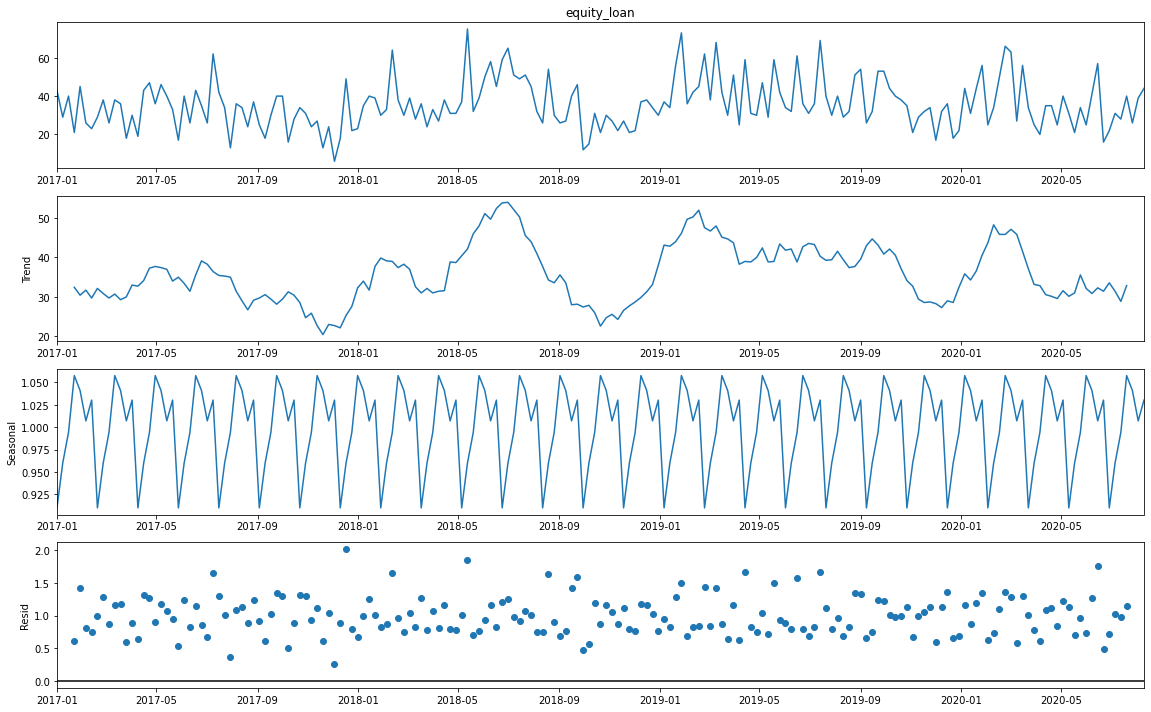

In [12]:
N,M = 16,10
result = seasonal_decompose(data['equity_loan'], model = 'multiplicative', period=7)
rcParams['figure.figsize'] = N,M
result.plot()
plt.show()

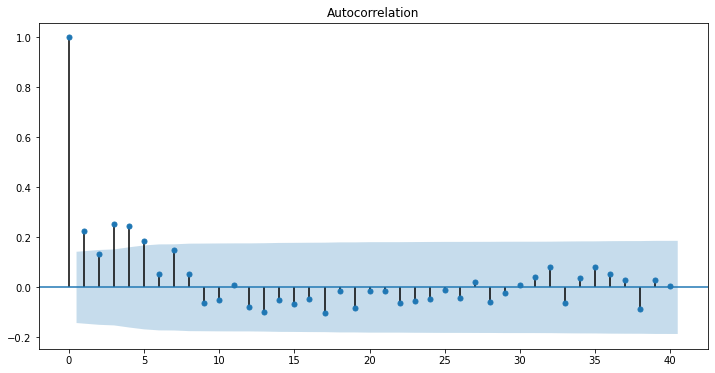

In [13]:
# get an acf plot

N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(data['equity_loan'], lags=40, ax=ax)
plt.show()

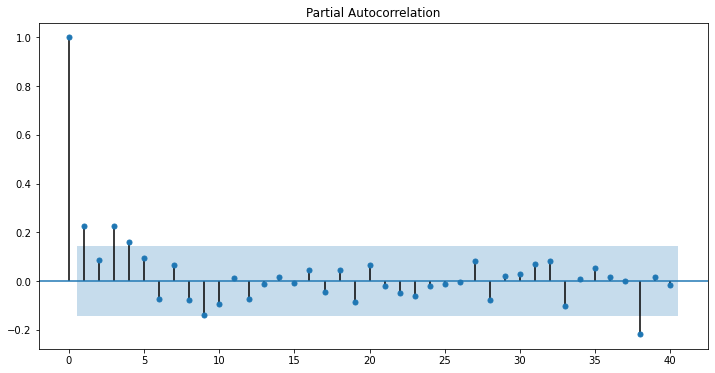

In [14]:
# get an pacf plot

N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(data['equity_loan'], lags=40, ax=ax)
plt.show()

In [95]:
horizon = 4

fcast = len(data) - horizon
fcast

185

In [96]:
train = data.iloc[0:fcast]
test = data.iloc[fcast:]

In [97]:
train

,equity_loan,home_equity
Week,,
2017-01-01,43,56
2017-01-08,29,42
2017-01-15,40,59
2017-01-22,21,45
2017-01-29,45,68
...,...,...
2020-06-14,57,81
2020-06-21,16,38
2020-06-28,22,39


In [98]:
test

,equity_loan,home_equity
Week,,
2020-07-19,40,71
2020-07-26,26,43
2020-08-02,39,59
2020-08-09,44,44


In [99]:
series = 'equity_loan'

In [100]:
train[series].shape

(185,)

In [101]:
wdf = pd.DataFrame(train[series])
wdf.head()

,equity_loan
Week,
2017-01-01,43
2017-01-08,29
2017-01-15,40
2017-01-22,21
2017-01-29,45


In [102]:
exog_data = pd.DataFrame(train['home_equity'])

exog_data.head()

,home_equity
Week,
2017-01-01,56
2017-01-08,42
2017-01-15,59
2017-01-22,45
2017-01-29,68


In [103]:
# a.reindex(b.index)

wdf.reindex(exog_data.index)

,equity_loan
Week,
2017-01-01,43
2017-01-08,29
2017-01-15,40
2017-01-22,21
2017-01-29,45
...,...
2020-06-14,57
2020-06-21,16
2020-06-28,22


In [130]:

model = SARIMAX(wdf['equity_loan'], order=(1,0,0), seasonal_order=(0,1,1,5), exog=train['home_equity'], enforce_invertibility=True)

results = model.fit()

results.summary()

C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         equity_loan   No. Observations:                  185
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 5)   Log Likelihood                -639.068
Date:                             Tue, 11 Aug 2020   AIC                           1286.137
Time:                                     20:37:29   BIC                           1298.909
Sample:                                 01-01-2017   HQIC                          1291.315
                                      - 07-12-2020                                         
Covariance Type:                               opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
home_equity     0.6352      0.038     16.711      0.000       0.561       0.710
ar.L1           0.0546      0.086      0.635      0.525      -0.114       0.223
ma.S.L5        -0.9999     22.327     -0.045      0.964     -44.760      42.760
sigma2         64.2465   1434.415      0.045      0.964   -2747.155    2875.648
===================================================================================
Ljung-Box (Q):                       55.36   Jarque-Bera (JB):                 2.53
Prob(Q):                              0.05   Prob(JB):                         0.28
Heteroskedasticity (H):               0.89   Skew:                             0.05
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
ts.get_dw(results)

2.0211008366554974

In [132]:
# set up for backtesting

start = len(train)
end = len(train) + len(test) - 1

print(start)
print(end)

185
188


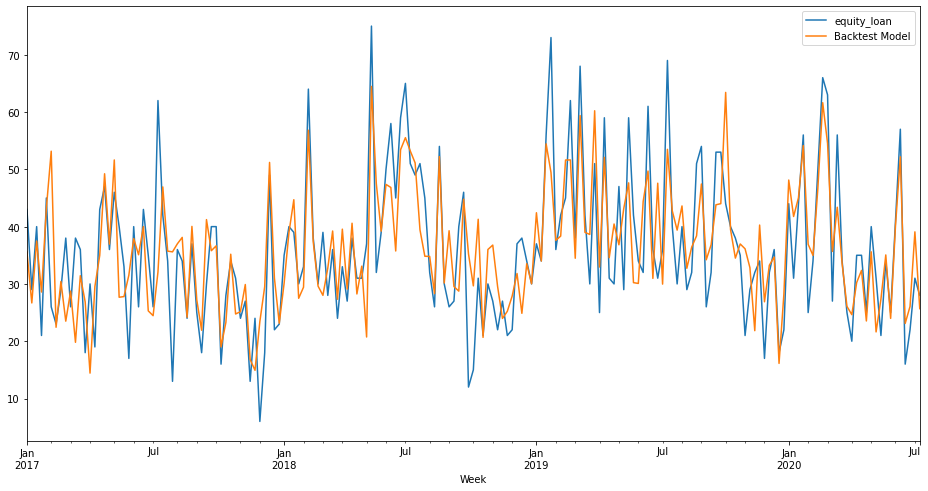

In [133]:
backtest = results.predict(start=0, end=start-1, typ='levels', exog=exog_data).rename('Backtest Model')


# make a plot of model fit
train['equity_loan'].plot(figsize=(16,8), legend=True)
backtest.plot(legend=True);

In [134]:
predictions = results.predict(start,end, exog=test['home_equity']).rename('SARIMA Model')

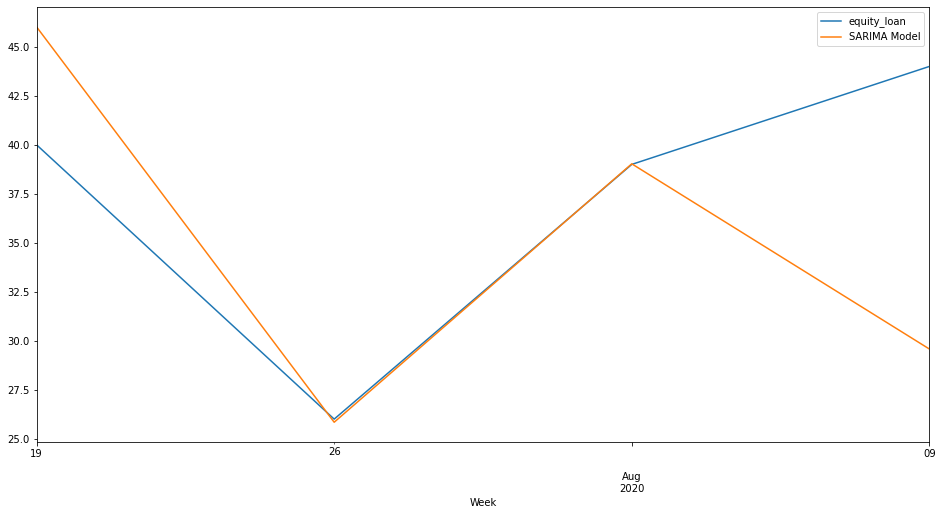

In [135]:
# make a plot of model fit

test['equity_loan'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True);

In [136]:
error = rmse(test[series], predictions)
print(f'{error:.0f}', 'RMSE')

CancMean = test[series].mean()
print(f'{CancMean:.0f}', 'Mean of ' + series)

percent = error/CancMean*100
print(f'{percent:.1f}', '% Error')

8 RMSE
37 Mean of equity_loan
21.0 % Error


# Home Equity

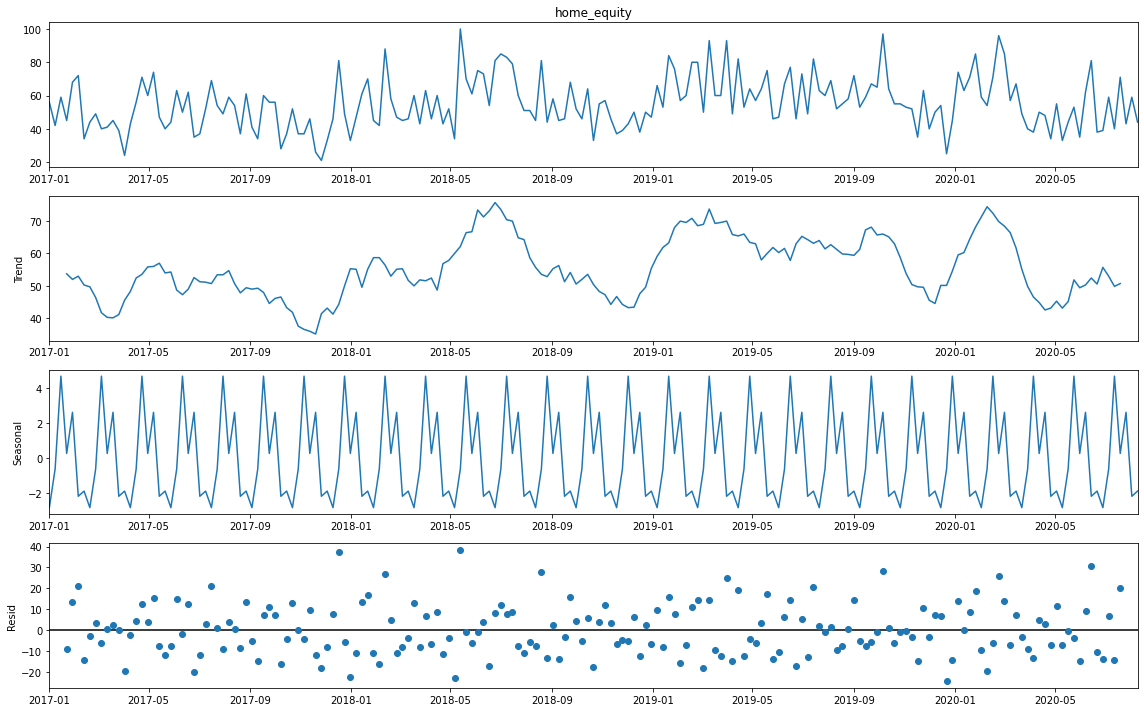

In [138]:
N,M = 16,10
result = seasonal_decompose(data['home_equity'], model = 'additive', period=7)
rcParams['figure.figsize'] = N,M
result.plot()
plt.show()

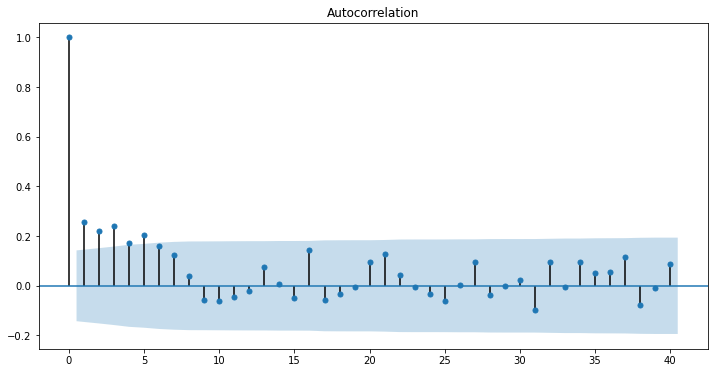

In [155]:
# get an acf plot

N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(data['home_equity'], lags=40, ax=ax)
plt.show()

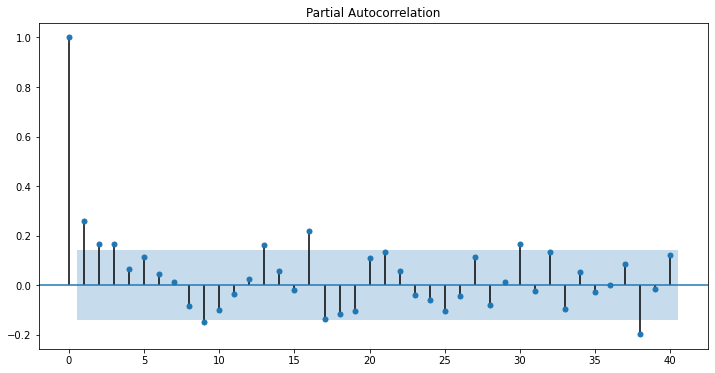

In [156]:
# get an pacf plot

N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(data['home_equity'], lags=40, ax=ax)
plt.show()

In [164]:
series = 'home_equity'

In [173]:
wdf = pd.DataFrame(train[series])
wdf.head()

,home_equity
Week,
2017-01-01,56
2017-01-08,42
2017-01-15,59
2017-01-22,45
2017-01-29,68


In [174]:
exog_data = pd.DataFrame(train['equity_loan'])

In [175]:
# a.reindex(b.index)

wdf.reindex(exog_data.index)


,home_equity
Week,
2017-01-01,56
2017-01-08,42
2017-01-15,59
2017-01-22,45
2017-01-29,68
...,...
2020-06-14,81
2020-06-21,38
2020-06-28,39


In [176]:

model = SARIMAX(wdf['home_equity'], order=(1,0,0), seasonal_order=(0,1,1,13), exog=train['equity_loan'], enforce_invertibility=True)

results = model.fit()

results.summary()

C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\bbutler\Documents\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          home_equity   No. Observations:                  185
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 13)   Log Likelihood                -654.823
Date:                              Wed, 12 Aug 2020   AIC                           1317.646
Time:                                      10:20:56   BIC                           1330.236
Sample:                                  01-01-2017   HQIC                          1322.755
                                       - 07-12-2020                                         
Covariance Type:                                opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
equity_loan     0.9370      0.055     17.136      0.000       0.830       1.044
ar.L1           0.0617      0.082      0.753      0.451      -0.099       0.222
ma.S.L13       -0.7907      0.066    -12.005      0.000      -0.920      -0.662
sigma2        110.1934     12.527      8.796      0.000      85.641     134.746
===================================================================================
Ljung-Box (Q):                       43.65   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.32   Prob(JB):                         0.89
Heteroskedasticity (H):               0.90   Skew:                            -0.07
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
ts.get_dw(results)

1.7445106012144225

In [159]:
# set up for backtesting

start = len(train)
end = len(train) + len(test) - 1

print(start)
print(end)

185
188


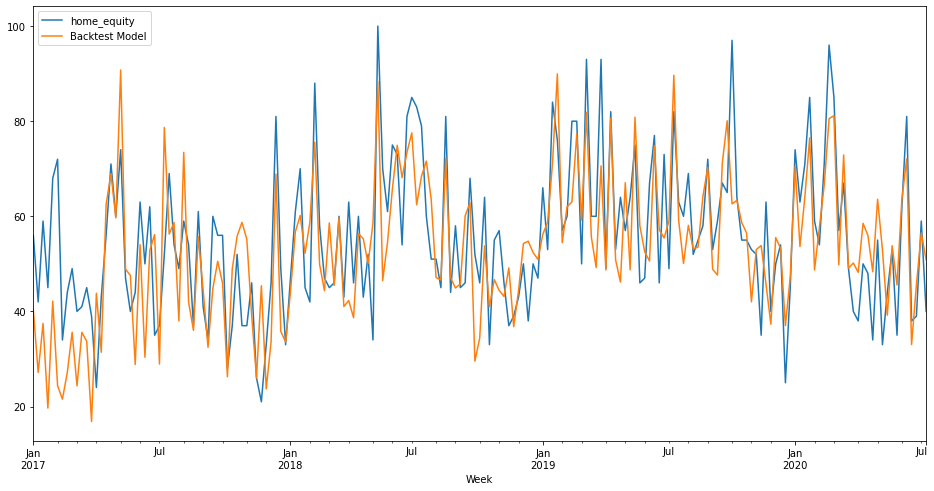

In [160]:
backtest = results.predict(start=0, end=start-1, typ='levels', exog=exog_data).rename('Backtest Model')


# make a plot of model fit
train['home_equity'].plot(figsize=(16,8), legend=True)
backtest.plot(legend=True);

In [161]:
predictions = results.predict(start,end, exog=test['equity_loan']).rename('SARIMA Model')

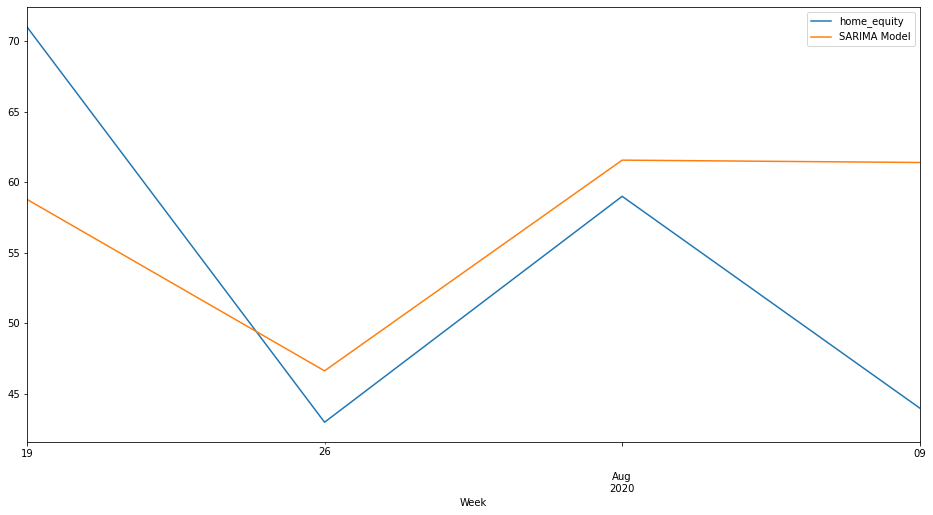

In [162]:
# make a plot of model fit

test['home_equity'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True);

In [163]:
error = rmse(test[series], predictions)
print(f'{error:.0f}', 'RMSE')

CancMean = test[series].mean()
print(f'{CancMean:.0f}', 'Mean of ' + series)

percent = error/CancMean*100
print(f'{percent:.1f}', '% Error')

11 RMSE
54 Mean of home_equity
20.0 % Error
